In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Setup

In [ ]:
# Reads the COVID-19 data from the New York Times by county in the U.S.
data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939988 entries, 0 to 939987
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    939988 non-null  object 
 1   county  939988 non-null  object 
 2   state   939988 non-null  object 
 3   fips    931216 non-null  float64
 4   cases   939988 non-null  int64  
 5   deaths  919901 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 43.0+ MB


In [ ]:
data.describe()

,fips,cases,deaths
count,931216.000000,9.399880e+05,919901.000000
mean,31272.924206,2.238276e+03,57.326599
std,16300.883885,1.174562e+04,461.961465
min,1001.000000,0.000000e+00,0.000000
25%,19001.000000,4.100000e+01,0.000000
50%,29217.000000,2.670000e+02,5.000000
75%,46101.000000,1.151000e+03,24.000000
max,78030.000000,1.015063e+06,26036.000000


In [ ]:
data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [ ]:
data.tail()

,date,county,state,fips,cases,deaths
939983,2021-01-17,Sweetwater,Wyoming,56037.0,3290,26.0
939984,2021-01-17,Teton,Wyoming,56039.0,2685,4.0
939985,2021-01-17,Uinta,Wyoming,56041.0,1817,9.0
939986,2021-01-17,Washakie,Wyoming,56043.0,842,23.0
939987,2021-01-17,Weston,Wyoming,56045.0,602,4.0


# Outline of What Could be Done

- Convert the date to datetime (if it isn't already) then add 3 columns - one each for month, day, and year.
- Heatmap of states and/or counties?
- countplot/scatterplot (or other) of cases and deaths
- scatterplot of cases and deaths based on fips
- animation with scatterplot/heatmap using fips to show growth over time

Note:

State and county files contain FIPS codes, a standard geographic identifier, to make it easier for an analyst to combine this data with other data sets like a map file or population data.

# Exploratory Data Analysis

## Converting ```date``` Column from ```string``` to ```datetime```

In [ ]:
# Checking the data type of elements in the date column

type(data['date'].iloc[0])

str

In [ ]:
# Converting the elements in the date column from str to datetime

data['date'] = pd.to_datetime(data['date'])

In [ ]:
# Creating 5 new columns based on month, month of year, day, day of month, and year

time = data['date'].iloc[0]

data['month'] = data['date'].apply(lambda time: time.month_name())
data['month of year'] = data['date'].apply(lambda time: time.month)
data['day'] = data['date'].apply(lambda time: time.day_name())
data['day of month'] = data['date'].apply(lambda time: time.day)
data['year'] = data['date'].apply(lambda time: time.year)

In [ ]:
data.head()

,date,county,state,fips,cases,deaths,month,month of year,day,day of month,year
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0,January,1,Tuesday,21,2020
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0,January,1,Wednesday,22,2020
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0,January,1,Thursday,23,2020
3,2020-01-24,Cook,Illinois,17031.0,1,0.0,January,1,Friday,24,2020
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0,January,1,Friday,24,2020


## Checking for Null Values

In [ ]:
data.isnull().sum()

date                 0
county               0
state                0
fips              8772
cases                0
deaths           20087
month                0
month of year        0
day                  0
day of month         0
year                 0
dtype: int64

This tells us that there are 8772 entries where the FIPS is null and 20,087 entries where the number of deaths isn't recorded

In [ ]:
# Gets the total number of rows with missing values for a given column.
total = data.isnull().sum().sort_values(ascending=False)

# Gets the percentage of missing data in a column.
percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)

# Concatenates the total and percentage DataFrame objects to create a new table.
# The total and percentage values are set to the columns with 1 being passed in
# for the axis parameter. The keys in the table are then set to the strings
# 'total' and 'percentage'.
missing_data = pd.concat([total, percentage], axis=1, keys=['total', 'percentage'])

missing_data

,total,percentage
deaths,20087,0.021369
fips,8772,0.009332
year,0,0.000000
day of month,0,0.000000
day,0,0.000000
month of year,0,0.000000
month,0,0.000000
cases,0,0.000000
state,0,0.000000
county,0,0.000000


In [ ]:
data[data['deaths'].isnull()]

,date,county,state,fips,cases,deaths,month,month of year,day,day of month,year
117486,2020-05-05,Adjuntas,Puerto Rico,72001.0,3,NaN,May,5,Tuesday,5,2020
117487,2020-05-05,Aguada,Puerto Rico,72003.0,7,NaN,May,5,Tuesday,5,2020
117488,2020-05-05,Aguadilla,Puerto Rico,72005.0,11,NaN,May,5,Tuesday,5,2020
117489,2020-05-05,Aguas Buenas,Puerto Rico,72007.0,22,NaN,May,5,Tuesday,5,2020
117490,2020-05-05,Aibonito,Puerto Rico,72009.0,13,NaN,May,5,Tuesday,5,2020
...,...,...,...,...,...,...,...,...,...,...,...
939145,2021-01-17,Vega Baja,Puerto Rico,72145.0,2460,NaN,January,1,Sunday,17,2021
939146,2021-01-17,Vieques,Puerto Rico,72147.0,193,NaN,January,1,Sunday,17,2021
939147,2021-01-17,Villalba,Puerto Rico,72149.0,657,NaN,January,1,Sunday,17,2021
939148,2021-01-17,Yabucoa,Puerto Rico,72151.0,899,NaN,January,1,Sunday,17,2021


In [ ]:
data[data['fips'].isnull()]

,date,county,state,fips,cases,deaths,month,month of year,day,day of month,year
416,2020-03-01,New York City,New York,NaN,1,0.0,March,3,Sunday,1,2020
418,2020-03-01,Unknown,Rhode Island,NaN,2,0.0,March,3,Sunday,1,2020
448,2020-03-02,New York City,New York,NaN,1,0.0,March,3,Monday,2,2020
450,2020-03-02,Unknown,Rhode Island,NaN,2,0.0,March,3,Monday,2,2020
482,2020-03-03,New York City,New York,NaN,2,0.0,March,3,Tuesday,3,2020
...,...,...,...,...,...,...,...,...,...,...,...
939142,2021-01-17,Unknown,Puerto Rico,NaN,4137,1703.0,January,1,Sunday,17,2021
939154,2021-01-17,Unknown,Rhode Island,NaN,12765,84.0,January,1,Sunday,17,2021
939355,2021-01-17,Unknown,Tennessee,NaN,13119,121.0,January,1,Sunday,17,2021
939642,2021-01-17,Unknown,Utah,NaN,1410,6.0,January,1,Sunday,17,2021


According to the README on the NYTimes covid-19-data repository, FIPS codes for areas like New York City (which is split into boroughs) is left empty. These may be added in the future.

In [ ]:
data[data['county'] == 'Unknown']

,date,county,state,fips,cases,deaths,month,month of year,day,day of month,year
418,2020-03-01,Unknown,Rhode Island,NaN,2,0.0,March,3,Sunday,1,2020
450,2020-03-02,Unknown,Rhode Island,NaN,2,0.0,March,3,Monday,2,2020
485,2020-03-03,Unknown,Rhode Island,NaN,2,0.0,March,3,Tuesday,3,2020
522,2020-03-04,Unknown,Rhode Island,NaN,2,0.0,March,3,Wednesday,4,2020
569,2020-03-05,Unknown,Rhode Island,NaN,2,0.0,March,3,Thursday,5,2020
...,...,...,...,...,...,...,...,...,...,...,...
939142,2021-01-17,Unknown,Puerto Rico,NaN,4137,1703.0,January,1,Sunday,17,2021
939154,2021-01-17,Unknown,Rhode Island,NaN,12765,84.0,January,1,Sunday,17,2021
939355,2021-01-17,Unknown,Tennessee,NaN,13119,121.0,January,1,Sunday,17,2021
939642,2021-01-17,Unknown,Utah,NaN,1410,6.0,January,1,Sunday,17,2021


### Graph 2.1 - Heatmap of Missing Values

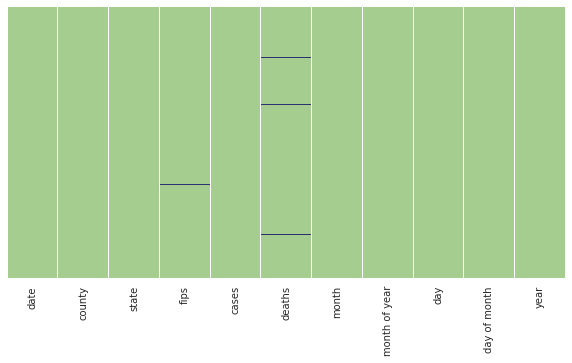

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='crest')

Our analysis from earlier showed that ~2.1% of the rows had a null value for ```deaths``` while ~0.93% of the rows had a null value for ```fips```. This corresponds to the heat map of the missing values for each column shown above. These percentages are negligible enough so that the null values can be ignored without heavily affecting our analysis on the data.

# Analysis of COVID-19 in the United States

## Analyzing United States COVID-19 Data in 2020

In [ ]:
# Gets the COVID-19 data at the end of 2020. We previously established
# that the bot automatically updates each county with the new totals for
# each day.
data_2020 = data[(data['year'] == 2020) & (data['month'] == 'December') & (data['day of month'] == 31)].sort_values('cases', ascending=False)

In [ ]:
data_2020

,date,county,state,fips,cases,deaths,month,month of year,day,day of month,year
881776,2020-12-31,Los Angeles,California,6037.0,770915,10345.0,December,12,Thursday,31,2020
883445,2020-12-31,New York City,New York,NaN,430863,25144.0,December,12,Thursday,31,2020
882187,2020-12-31,Cook,Illinois,17031.0,393652,8285.0,December,12,Thursday,31,2020
881674,2020-12-31,Maricopa,Arizona,4013.0,322449,5125.0,December,12,Thursday,31,2020
881936,2020-12-31,Miami-Dade,Florida,12086.0,298872,4188.0,December,12,Thursday,31,2020
...,...,...,...,...,...,...,...,...,...,...,...
884343,2020-12-31,Loving,Texas,48301.0,1,0.0,December,12,Thursday,31,2020
882770,2020-12-31,Unknown,Maine,NaN,1,0.0,December,12,Thursday,31,2020
882125,2020-12-31,Kalawao,Hawaii,15005.0,1,0.0,December,12,Thursday,31,2020
882564,2020-12-31,Unknown,Kansas,NaN,0,402.0,December,12,Thursday,31,2020


From this, it's clear that the NYTimes COVID bot updates the new running count every day as opposed to the new cases and deaths each day.

### Graph 3.1 - Bar Plot of COVID-19 Cases and Deaths in 2020

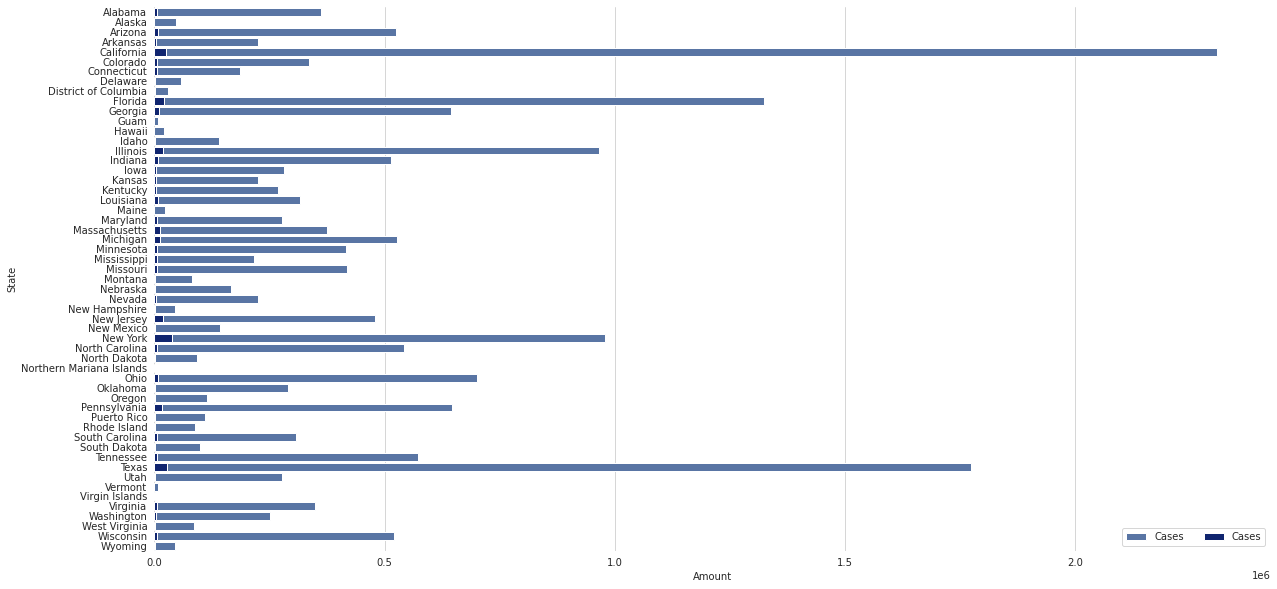

In [143]:
f, ax = plt.subplots(figsize=(20, 10))

state_data_2020 = data_2020.drop(labels=['date', 'county', 'fips', 'month', 'month of year',
                                         'day', 'day of month', 'year'], axis=1)
state_data_2020 = state_data_2020.sort_values('state').reset_index(drop=True)

state_data_2020 = state_data_2020.groupby('state').sum()

sns.set_color_codes('deep')
sns.barplot(x='cases', y=state_data_2020.index, data=state_data_2020, label='Cases', color='b')

sns.set_color_codes('dark')
sns.barplot(x='deaths', y=state_data_2020.index, data=state_data_2020, label='Cases', color='b')

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="State", xlabel="Amount")
sns.despine(left=True, bottom=True)

As shown by Graph 3.1, New York, Texas, California, Florida, New Jersey, Illinois, Massachusetts, and Michigan stand out as states with the most deaths due to COVID-19 at the end of 2020. On the other hand, the following states are ranked by their number of COVID-19 cases according to the graph:
1. California
1. Texas
1. Florida
1. New York
1. Illinois


## Analyzing Current United States COVID-19 Data

In [ ]:
# Shows that the date is currently a Timestamp object
type(data['date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# Shows that the datetime object has type
today = pd.to_datetime('now').date()
print(today.year, today.month, today.day)
print(type(data['year'].iloc[0]))
print(type(int(data['year'].iloc[0])))
print(type(today.year))

2021 1 18
<class 'numpy.int64'>
<class 'int'>
<class 'int'>


In [ ]:
# Shows that the 'date' column in data is normalized to
# have its times set to midnight.
print(data.iloc[2]['date'])

# Normalizes a datetime object to set the time to midnight.
print(pd.Timestamp.now().normalize())

2020-01-23 00:00:00
2021-01-18 00:00:00


### Getting the Current Data

In [ ]:
from datetime import datetime, timedelta

def get_curr_data(data):
  '''
  precondition: data is a pandas DataFrame object
  postcondition: returns the rows with yesterday's date
  '''

  # Gets yesterday's date since the NYTimes COVID bot updates the previous day's reports
  # at roughly 1AM EST.
  yesterday = datetime.now() - timedelta(days=1)

  # Creates a new DataFrame as a subset of the data passed into the function where
  # the date is for the previous day.
  curr_data = data[(data['year'] == yesterday.year) &
                 (data['month of year'] == yesterday.month) &
                 (data['day of month'] == yesterday.day)].reset_index()

  return curr_data

In [ ]:
curr_data = get_curr_data(data)

curr_data

,index,date,county,state,fips,cases,deaths,month,month of year,day,day of month,year
0,936743,2021-01-17,Autauga,Alabama,1001.0,5184,55.0,January,1,Sunday,17,2021
1,936744,2021-01-17,Baldwin,Alabama,1003.0,16251,182.0,January,1,Sunday,17,2021
2,936745,2021-01-17,Barbour,Alabama,1005.0,1729,36.0,January,1,Sunday,17,2021
3,936746,2021-01-17,Bibb,Alabama,1007.0,2151,47.0,January,1,Sunday,17,2021
4,936747,2021-01-17,Blount,Alabama,1009.0,5304,83.0,January,1,Sunday,17,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
3240,939983,2021-01-17,Sweetwater,Wyoming,56037.0,3290,26.0,January,1,Sunday,17,2021
3241,939984,2021-01-17,Teton,Wyoming,56039.0,2685,4.0,January,1,Sunday,17,2021
3242,939985,2021-01-17,Uinta,Wyoming,56041.0,1817,9.0,January,1,Sunday,17,2021
3243,939986,2021-01-17,Washakie,Wyoming,56043.0,842,23.0,January,1,Sunday,17,2021


In [ ]:
sorted_curr_data = curr_data.sort_values('cases', ascending=False)

sorted_curr_data

,index,date,county,state,fips,cases,deaths,month,month of year,day,day of month,year
204,936947,2021-01-17,Los Angeles,California,6037.0,1015063,13848.0,January,1,Sunday,17,2021
1873,938616,2021-01-17,New York City,New York,NaN,529834,26036.0,January,1,Sunday,17,2021
615,937358,2021-01-17,Cook,Illinois,17031.0,433089,9005.0,January,1,Sunday,17,2021
102,936845,2021-01-17,Maricopa,Arizona,4013.0,417839,6444.0,January,1,Sunday,17,2021
364,937107,2021-01-17,Miami-Dade,Florida,12086.0,344245,4595.0,January,1,Sunday,17,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
553,937296,2021-01-17,Kalawao,Hawaii,15005.0,1,0.0,January,1,Sunday,17,2021
2771,939514,2021-01-17,Loving,Texas,48301.0,1,0.0,January,1,Sunday,17,2021
992,937735,2021-01-17,Unknown,Kansas,NaN,0,699.0,January,1,Sunday,17,2021
1223,937966,2021-01-17,Unknown,Maryland,NaN,0,76.0,January,1,Sunday,17,2021


### Graph 3.2 - Scatter Plot of Current State vs. Cases and Death Count

Text(0.5, 1.0, 'State vs. COVID-19 Cases')

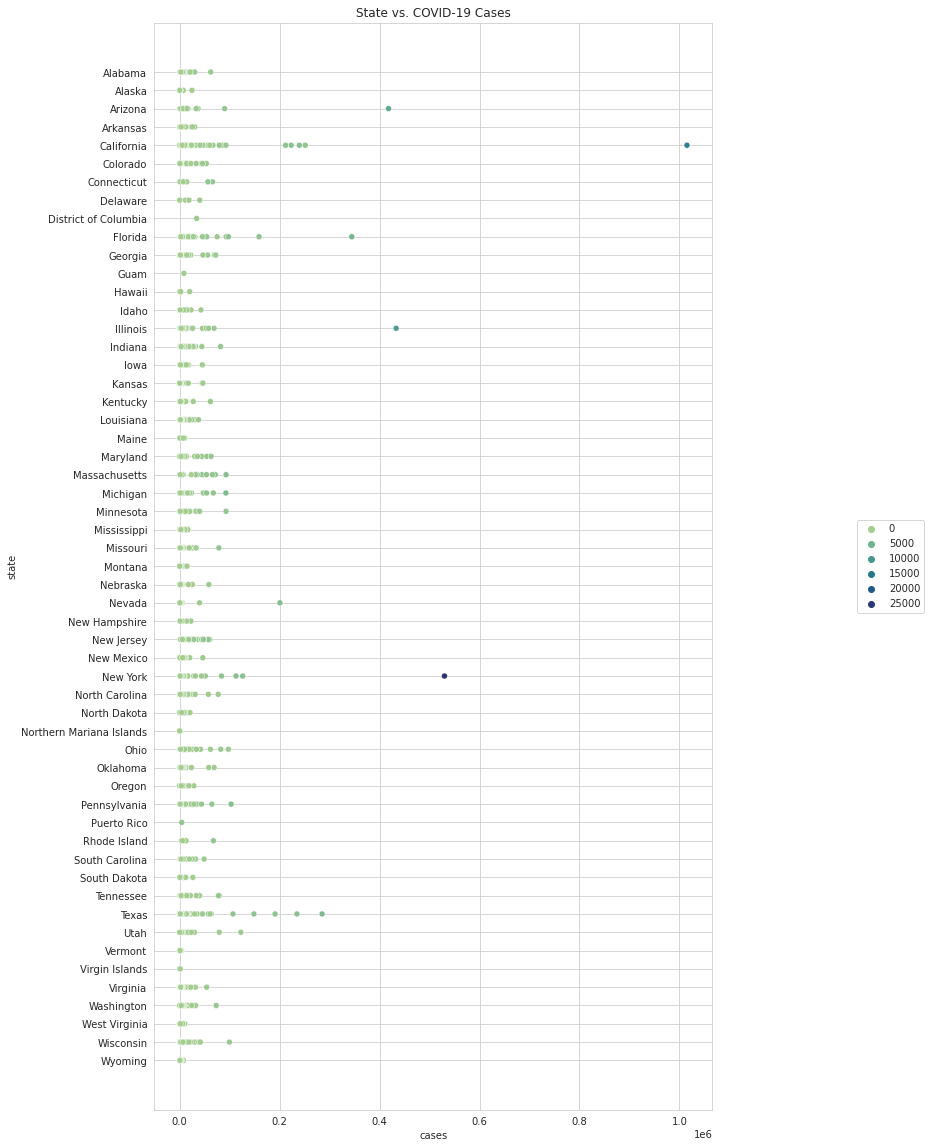

In [ ]:
plt.figure(figsize=(10,20))
sns.scatterplot(x=curr_data['cases'], y=curr_data['state'], hue=curr_data['deaths'], data=curr_data, palette='crest')
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('State vs. COVID-19 Cases')

This scatter plot shows that California, New York, Arizona, Florida, Illinois, and Texas have the most cases and deaths among the 50 states and 5 territories displayed.

### Graph 3.3 - Plot of COVID-19 Cases per State/Territory Since First Report

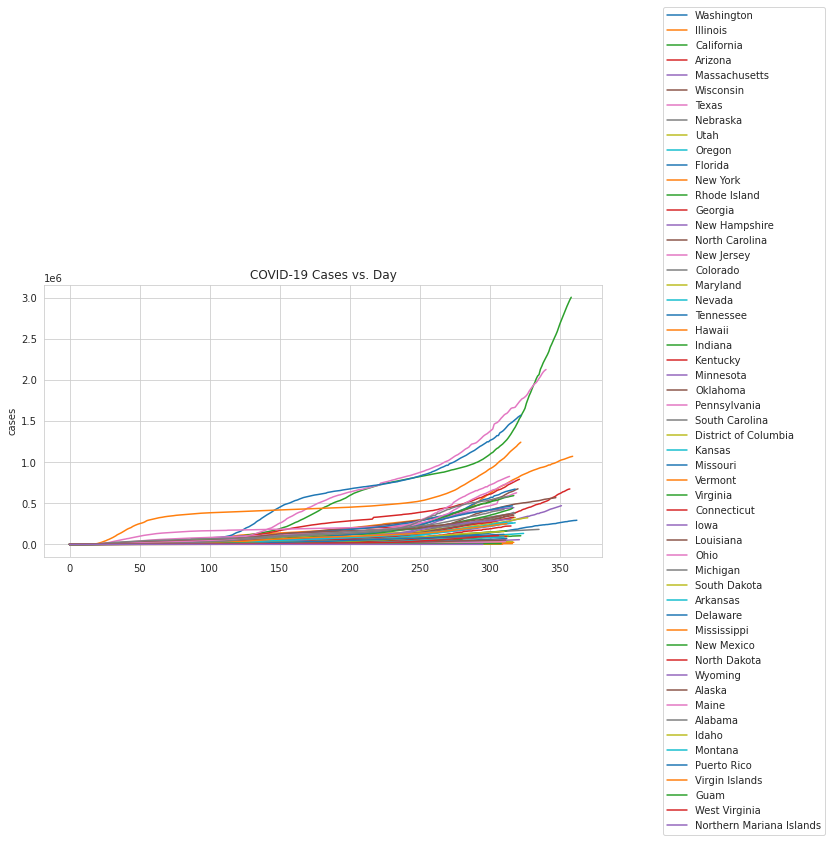

In [ ]:
plt.figure(figsize=(10,5))


for state in data.state.unique():
  state_data = data[data['state'] == state].reset_index()
  state_data = state_data.drop(labels=['county', 'state', 'fips', 'month', 'month of year', 'day',
                                       'day of month', 'year'], axis=1)
  state_data = state_data.groupby('date').sum().reset_index()
  sns.lineplot(data=state_data['cases'], label=state)

plt.title('COVID-19 Cases vs. Day')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), ncol=1)

There are 50 states and 5 territories plotted on this graph. As a result, it is difficult to tell which line corresponds to which state or territory. However, we can surmise - using the deductions from Graph 3.2 - that the green line reaching around 3e6 cases is California. More detailed analysis between states will be run in Section 5.

### Graph 3.4 - Plot of COVID-19 Deaths per State/Territory Since First Report

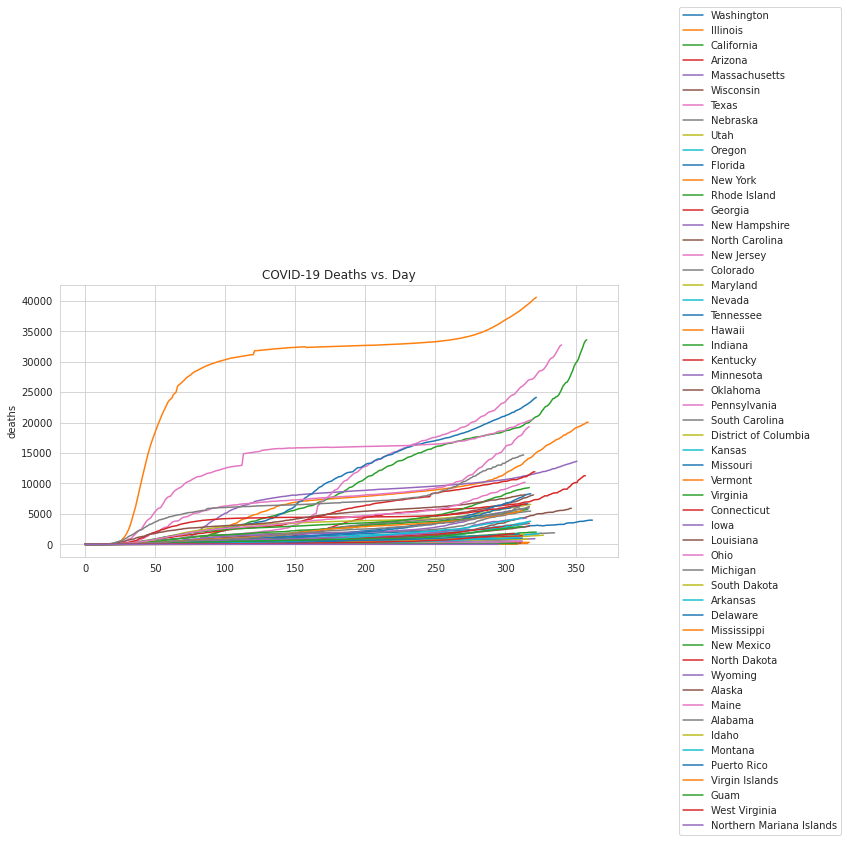

In [ ]:
plt.figure(figsize=(10,5))


for state in data.state.unique():
  state_data = data[data['state'] == state].reset_index()
  state_data = state_data.drop(labels=['county', 'state', 'fips', 'month', 'month of year', 'day',
                                       'day of month', 'year'], axis=1)
  state_data = state_data.groupby('date').sum().reset_index()
  sns.lineplot(data=state_data['deaths'], label=state)

plt.title('COVID-19 Deaths vs. Day')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), ncol=1)

Similar to Graph 3.3, we can use Graph 3.2 to deduce the following:
- The orange curve setting the highest number of deaths belongs to New York
- California is the green curve at around 34,000 deaths
- Texas is likely the pink curve at around 32,500 deaths

# Analysis of COVID-19 Cases in NY from Dec. 2020 to Jan. 2021

## COVID-19 Cases in NYC Since First Report

In [ ]:
# Creating a subset of the original data to get the data pertaining to NYC
nyc_data = data[(data['state'] == 'New York') & (data['county'] == 'New York City')].reset_index(drop=True)

In [ ]:
nyc_data

,date,county,state,fips,cases,deaths,month,month of year,day,day of month,year
0,2020-03-01,New York City,New York,NaN,1,0.0,March,3,Sunday,1,2020
1,2020-03-02,New York City,New York,NaN,1,0.0,March,3,Monday,2,2020
2,2020-03-03,New York City,New York,NaN,2,0.0,March,3,Tuesday,3,2020
3,2020-03-04,New York City,New York,NaN,2,0.0,March,3,Wednesday,4,2020
4,2020-03-05,New York City,New York,NaN,4,0.0,March,3,Thursday,5,2020
...,...,...,...,...,...,...,...,...,...,...,...
318,2021-01-13,New York City,New York,NaN,504826,25741.0,January,1,Wednesday,13,2021
319,2021-01-14,New York City,New York,NaN,510711,25834.0,January,1,Thursday,14,2021
320,2021-01-15,New York City,New York,NaN,517963,25909.0,January,1,Friday,15,2021
321,2021-01-16,New York City,New York,NaN,524231,25970.0,January,1,Saturday,16,2021


This subset of data tells us that the first report of COVID-19 cases and deaths in NYC came on March 1, 2020.

### Graph 4.1 - Plot of COVID-19 Cases Since First Report in NYC

[Text(0.5, 0, 'day'),
 Text(0.5, 1.0, 'COVID-19 Cases Since First Report - NYC')]

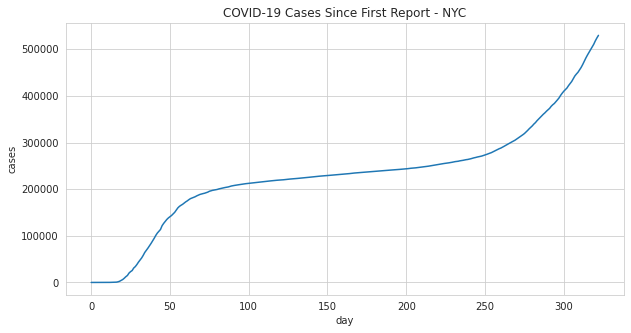

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=nyc_data['cases']).set(title='COVID-19 Cases Since First Report - NYC', xlabel='day')

Graph 4.1 shows that the largest increases in COVID-19 cases in NYC came between days 20 and 75 and days 250 and 325 after March 1. These ranges correspond to late March to early June and early November to present day. This conclusion makes sense since we know that the peaks in COVID cases in NYC came around the end of the spring 2020 semester and after Halloween 2020.

## COVID-19 Deaths in NYC Since First Report

### Graph 4.2 - Plot of COVID-19 Deaths Since First Report in NYC

[Text(0.5, 0, 'day'),
 Text(0.5, 1.0, 'COVID-19 Cases Since First Report - NYC')]

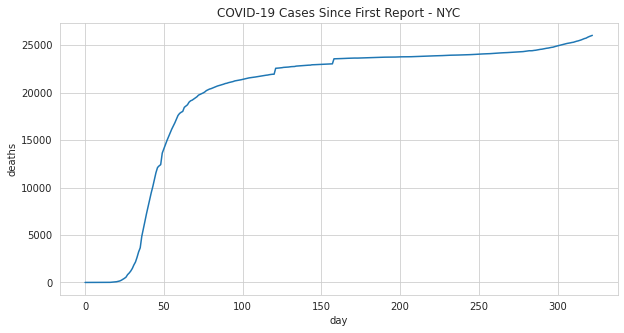

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=nyc_data['deaths']).set(title='COVID-19 Cases Since First Report - NYC', xlabel='day')

Graph 4.2 shows that the largest increase in COVID-related deaths occurred between days 25 and 100 after March 1. After this, the rate of increase in deaths became more steady with the exception of a couple abrupt jumps (around day 100 and day 155). As seen by the end of the graph, however, there appears to be another increase in deaths as the curve mimics the "S" shape seen between days 0 and 120.

## COVID-19 Cases in NYC Over Last 30 Days

In [ ]:
# Creating a subset of the NYC data to get the last 30 days
last_30_nyc = nyc_data.tail(30).reset_index(drop=True)

last_30_nyc

,date,county,state,fips,cases,deaths,month,month of year,day,day of month,year
0,2020-12-19,New York City,New York,NaN,381067,24677.0,December,12,Saturday,19,2020
1,2020-12-20,New York City,New York,NaN,383808,24697.0,December,12,Sunday,20,2020
2,2020-12-21,New York City,New York,NaN,387595,24735.0,December,12,Monday,21,2020
3,2020-12-22,New York City,New York,NaN,391634,24768.0,December,12,Tuesday,22,2020
4,2020-12-23,New York City,New York,NaN,395810,24790.0,December,12,Wednesday,23,2020
5,2020-12-24,New York City,New York,NaN,401251,24842.0,December,12,Thursday,24,2020
6,2020-12-25,New York City,New York,NaN,405857,24889.0,December,12,Friday,25,2020
7,2020-12-26,New York City,New York,NaN,410048,24931.0,December,12,Saturday,26,2020
8,2020-12-27,New York City,New York,NaN,413472,24973.0,December,12,Sunday,27,2020
9,2020-12-28,New York City,New York,NaN,416922,25008.0,December,12,Monday,28,2020


### Graph 4.3 - Plot of COVID-19 Cases Over Last 30 Days


[Text(0.5, 0, 'day'), Text(0.5, 1.0, 'COVID-19 Cases Over Last 30 Days - NYC')]

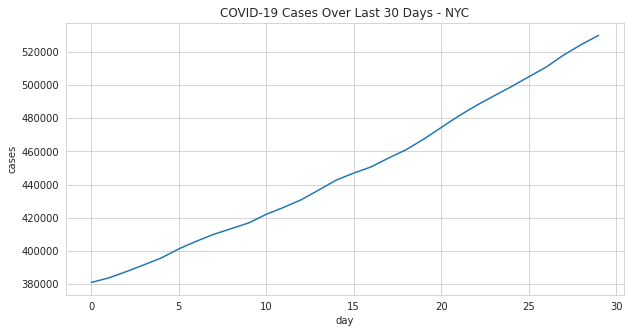

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=last_30_nyc['cases']).set(title='COVID-19 Cases Over Last 30 Days - NYC', xlabel='day')

Graph 4.3 appears to be linear since we're operating on a small data set; however, as shown by graph 4.1, this is not the case.

## COVID-19 Deaths in NYC Over Last 30 Days

### Graph 4.4 - Plot of COVID-19 Deaths Over Last 30 Days


[Text(0.5, 0, 'day'), Text(0.5, 1.0, 'COVID-19 Cases Over Last 30 Days - NYC')]

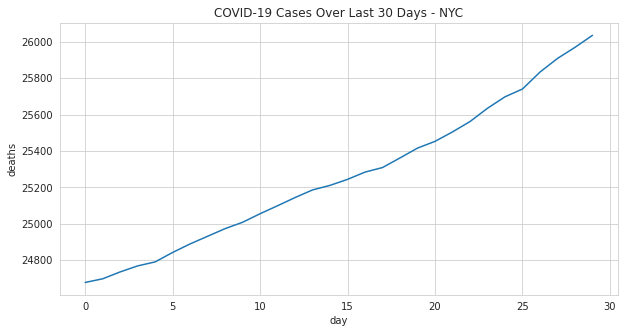

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=last_30_nyc['deaths']).set(title='COVID-19 Cases Over Last 30 Days - NYC', xlabel='day')

Graph 4.4 appears to be linear since we're operating on a small data set; however, as shown by graph 4.2, this may not be the case.

# Comparing COVID-19 Cases in NY to Other States and Territories

## Testing with Consolidating State Data by Date

Using California as an example.

In [ ]:
cali_data = data[data['state'] == 'California'].reset_index(drop=True)
cali_data = cali_data.drop(labels=['county', 'state', 'fips', 'month', 'month of year', 'day',
                       'day of month', 'year'], axis=1)
cali_data

,date,cases,deaths
0,2020-01-25,1,0.0
1,2020-01-26,1,0.0
2,2020-01-26,1,0.0
3,2020-01-27,1,0.0
4,2020-01-27,1,0.0
...,...,...,...
17782,2021-01-17,40655,501.0
17783,2021-01-17,3304,38.0
17784,2021-01-17,60368,412.0
17785,2021-01-17,10406,131.0


In [ ]:
cali_data.groupby('date').sum().reset_index()

,date,cases,deaths
0,2020-01-25,1,0.0
1,2020-01-26,2,0.0
2,2020-01-27,2,0.0
3,2020-01-28,2,0.0
4,2020-01-29,2,0.0
...,...,...,...
354,2021-01-13,2857587,31653.0
355,2021-01-14,2898271,32246.0
356,2021-01-15,2937376,32947.0
357,2021-01-16,2974966,33393.0
